# ML Tutorial Day 16

## Regularization

Suppose we have the age and matches won data of a player. In the following plot, we can see that as their age is increasing, the matches won decreases. (swap the axes to get the correct graph)

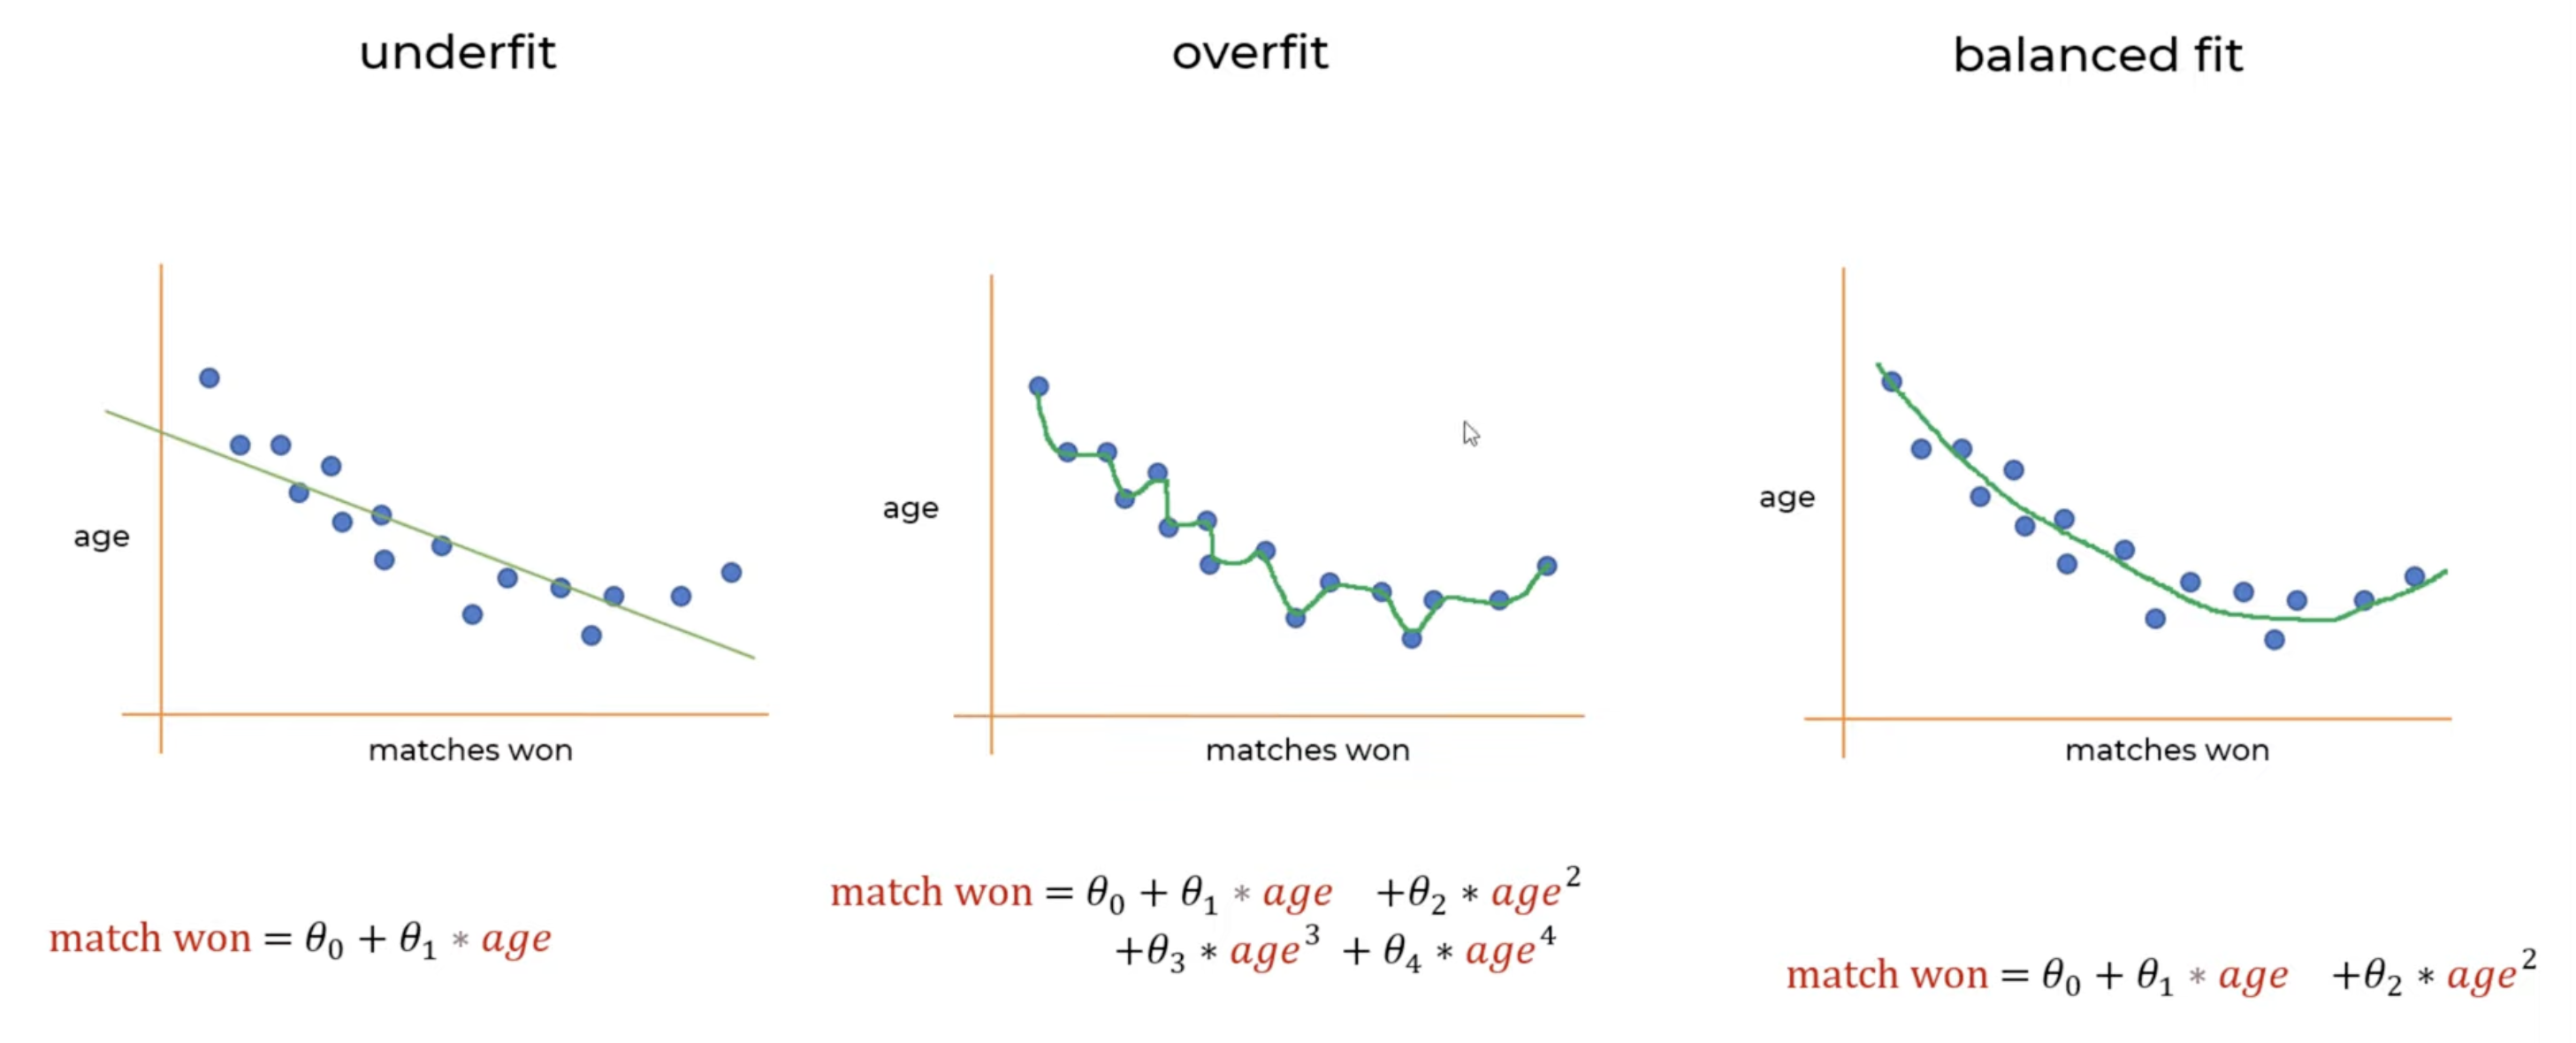

In the first example, we say that the model underfits the data, as it doesn't pass through a lot of points.

In the second example, we say that the model overfits the data, as it passes through all the points and their is no generalization.

In the third example, we say that we have a balanced fit, as the model approximately passes through all the datapoints while also being simple.

In the above example we can reduce the overfitting by making $\theta_{3}$ and $\theta_{4}$ small.

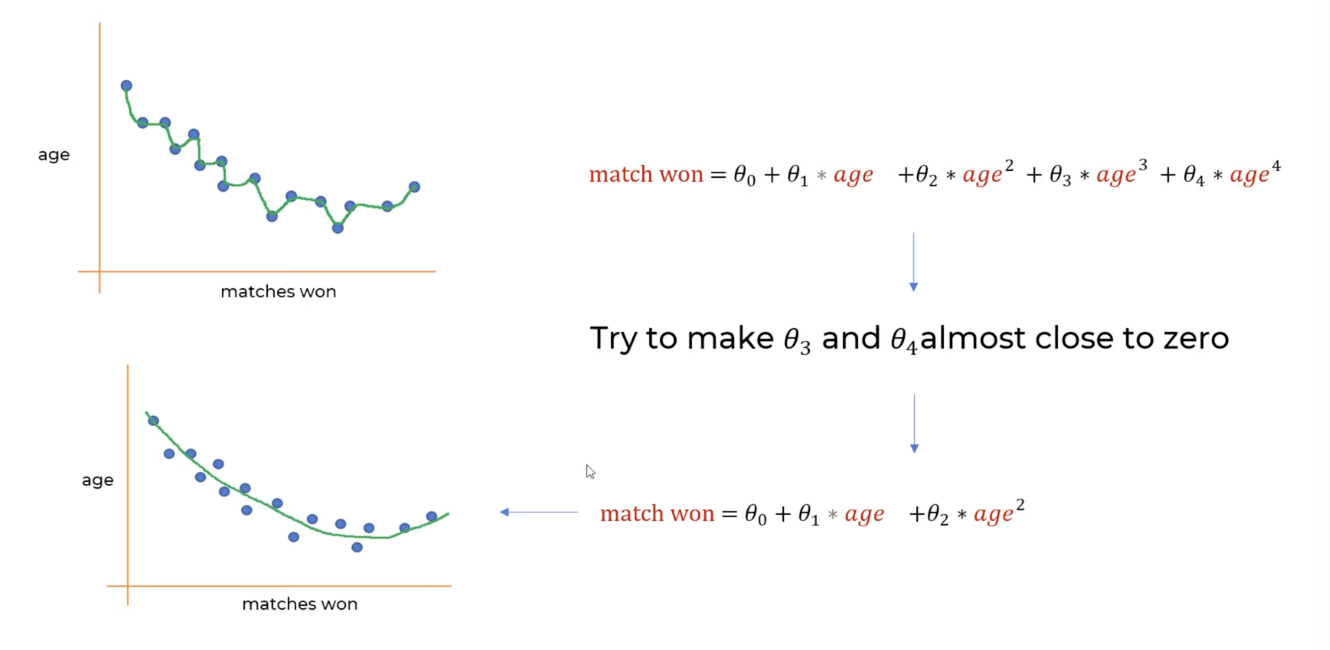

How do we make some parameters close to zero?

We look at the mean squared error where $\text{h}_{\theta}(x_{i})$ is the predicted value.

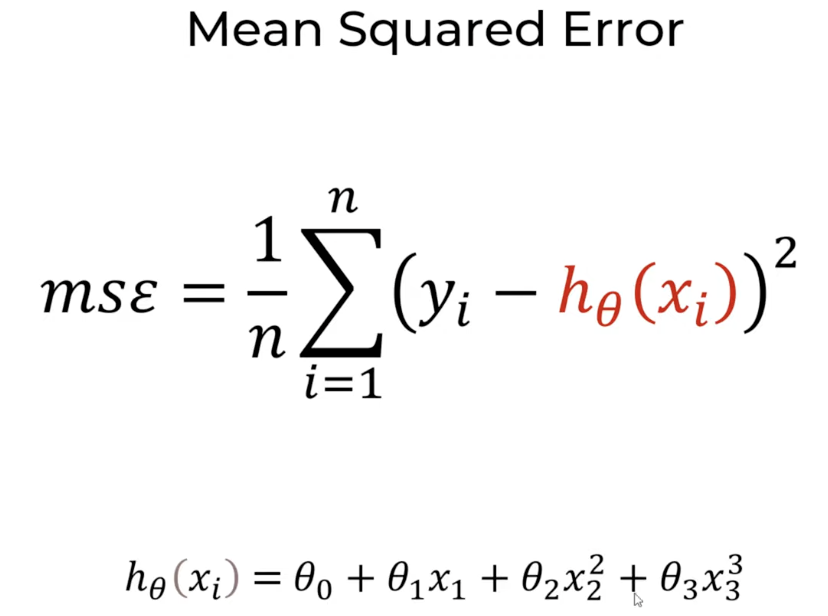

Now we want to minimize the MSE during training and if we introduce additional terms in the MSE, then we can penalize our model for choosing higher values of $\theta$

We can introduce the regularization terms in MSE:

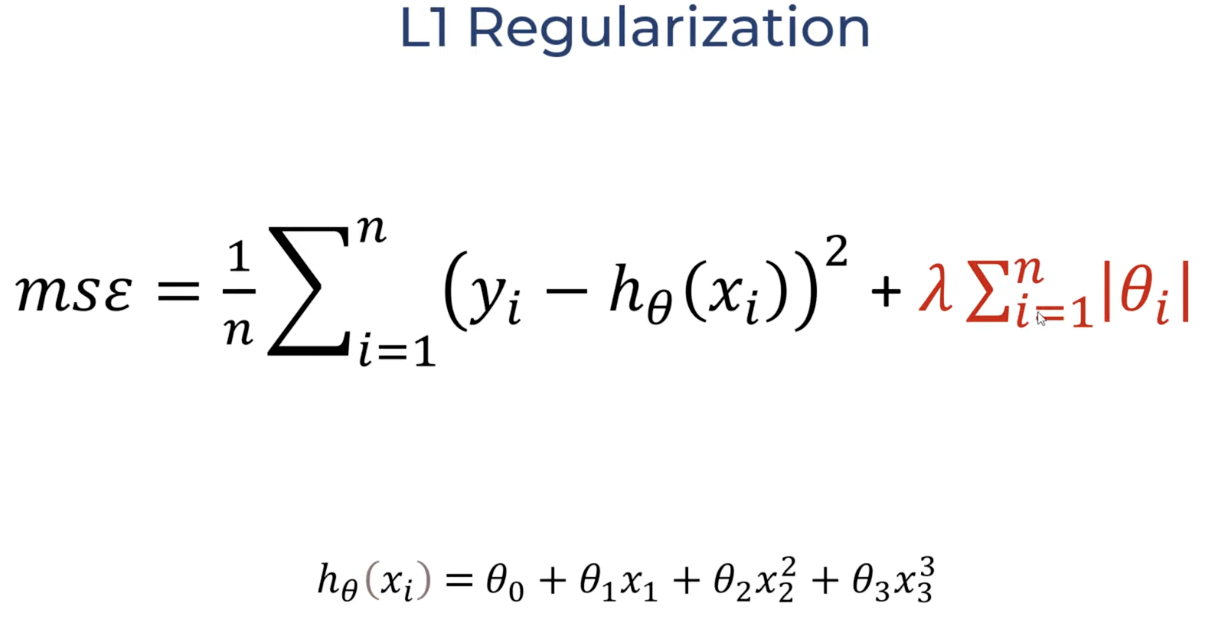

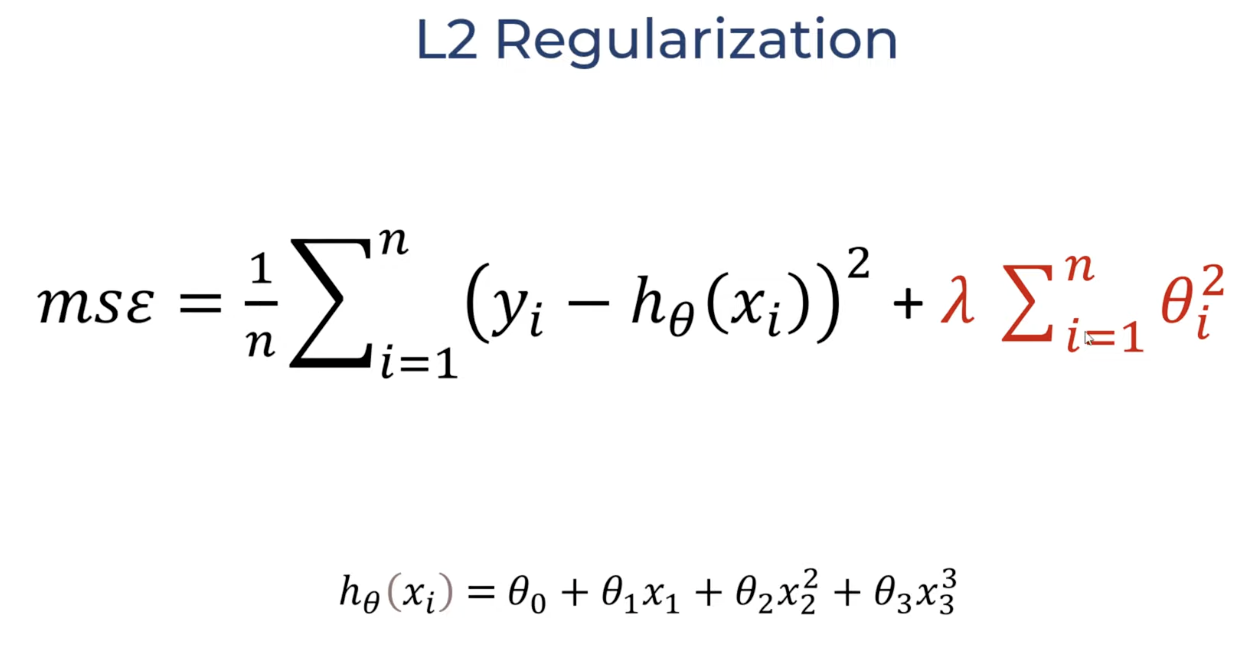

In `sklearn` lasso is L1 and ridge is L2

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import the data
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

In [ ]:
# keeping important columns
df = df[['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 
        'Propertycount', 'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'Price']]
df.head()

In [ ]:
# handling NA values

# replacing by 0
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

# replacing by mean of the columns
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mean())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [ ]:
# we will drop the rows with NA
df = df.dropna()

df.isna().sum()

Next we have to handle columns with text data, and we will use one hot encoding to convert them to numerical data.

In [ ]:
# converting text data into numerical data for one hot encoding
df = pd.get_dummies(df, drop_first = True) # drop_first to avoid dummy variable trap
df.head()

In [ ]:
# creating training and testing dataset
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(df.drop(['Price'], axis = 1), df['Price'], test_size = 0.3)

In [ ]:
# creating linear regression model
from sklearn.linear_model import LinearRegression as lr
reg = lr()
reg.fit(X_train, y_train)

# model score on testing dataset
reg.score(X_test, y_test)

In [ ]:
# model score on training dataset
reg.score(X_train, y_train)

Since we see huge difference between training and testing score, we conclude that our model has overfitted the training data and thus, is performing poorly on the testing data.

We will use L1 regularization to cure it of overfitting

In [ ]:
# using L1 regularization
from sklearn.linear_model import Lasso as l
lasso_reg = l(alpha=50, max_iter = 100, tol = 0.1)
lasso_reg.fit(X_train, y_train)

In [ ]:
# model score on testing dataset
lasso_reg.score(X_test, y_test)

In [ ]:
# model score on training dataset
lasso_reg.score(X_train, y_train)

In [ ]:
# using ridge regularization
from sklearn.linear_model import Ridge as r
ridge_reg = r(alpha=50, max_iter = 100, tol = 0.1)
ridge_reg.fit(X_train, y_train)

In [ ]:
# model score on testing dataset
ridge_reg.score(X_test, y_test)

In [ ]:
# model score on training dataset
ridge_reg.score(X_train, y_train)